In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

## 1. Pra-Pemrosesan Data

sebelum pra-pemrosesan

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


sesudah pra pemrosesan data

In [ ]:
# Membuat objek SimpleImputer untuk mengisi nilai yang hilang dengan mean
imputer = SimpleImputer(strategy='mean')

# Mengisi nilai yang hilang pada kolom 'Usia'
data['Age'] = imputer.fit_transform(data[['Age']])
# Menghapus data yang duplikat berdasarkan kolom CustomerID
data.drop_duplicates(subset=['CustomerID'], inplace=True)
# Menampilkan 5 baris pertama data setelah pra-pemrosesan
print(data)


     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male  19.0                  15                      39
1             2    Male  21.0                  15                      81
2             3  Female  20.0                  16                       6
3             4  Female  23.0                  16                      77
4             5  Female  31.0                  17                      40
..          ...     ...   ...                 ...                     ...
195         196  Female  35.0                 120                      79
196         197  Female  45.0                 126                      28
197         198    Male  32.0                 126                      74
198         199    Male  32.0                 137                      18
199         200    Male  30.0                 137                      83

[200 rows x 5 columns]


## 2. Analisis Statistik Deskriptif

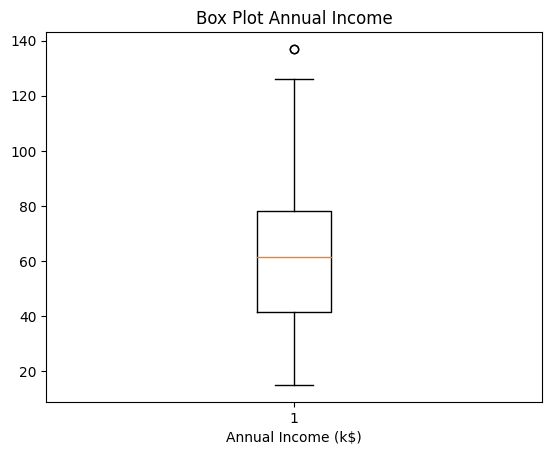

In [ ]:
plt.boxplot(data['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.title('Box Plot Annual Income')
plt.show()

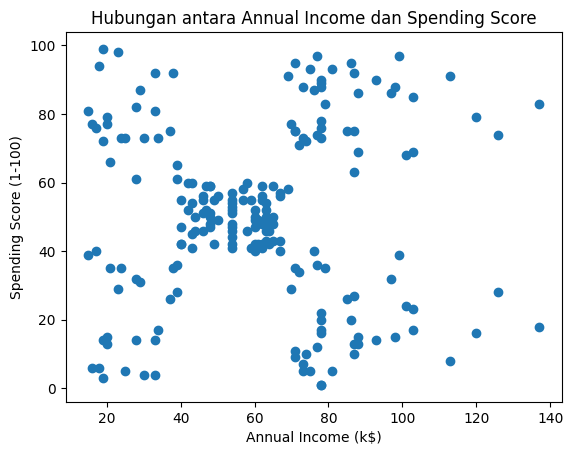

In [ ]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hubungan antara Annual Income dan Spending Score')
plt.show()

In [ ]:
age_stats = data['Age'].describe()
print(age_stats)

mean_age = data['Age'].mean()
median_age = data['Age'].median()
mode_age = data['Age'].mode().iloc[0]
age_range = data['Age'].max() - data['Age'].min()
variance_age = data['Age'].var()
std_dev_age = data['Age'].std()

print("\nMean (Rata-rata Age): ", mean_age)
print("Median (Nilai Tengah Age): ", median_age)
print("Mode (Nilai yang Paling Sering Muncul Age): ", mode_age)
print("Range (Selisih antara Nilai Maksimum dan Minimum Age): ", age_range)
print("Variance (Variansi Age): ", variance_age)
print("Standard Deviation (Deviasi Standar Age): ", std_dev_age)

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

Mean (Rata-rata Age):  38.85
Median (Nilai Tengah Age):  36.0
Mode (Nilai yang Paling Sering Muncul Age):  32.0
Range (Selisih antara Nilai Maksimum dan Minimum Age):  52.0
Variance (Variansi Age):  195.13316582914572
Standard Deviation (Deviasi Standar Age):  13.96900733155888


## 3. Pembangunan Model

In [ ]:
#------
# Membuat objek KMeans dengan jumlah cluster k
kmeans = KMeans(n_clusters=5, n_init=10)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
# Melakukan clustering pada data
kmeans.fit(X)

# Menambahkan kolom cluster ke dalam dataset
data['Cluster'] = kmeans.labels_

# Menampilkan hasil clustering
print(data)

     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male  19.0                  15                      39   
1             2    Male  21.0                  15                      81   
2             3  Female  20.0                  16                       6   
3             4  Female  23.0                  16                      77   
4             5  Female  31.0                  17                      40   
..          ...     ...   ...                 ...                     ...   
195         196  Female  35.0                 120                      79   
196         197  Female  45.0                 126                      28   
197         198    Male  32.0                 126                      74   
198         199    Male  32.0                 137                      18   
199         200    Male  30.0                 137                      83   

     Cluster  
0          0  
1          3  
2          0  
3          3  


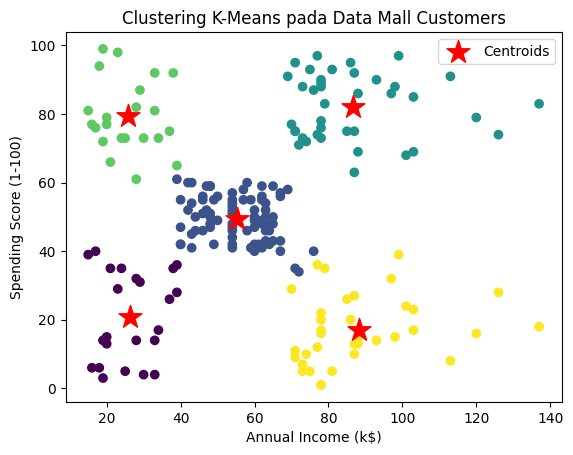

In [ ]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering K-Means pada Data Mall Customers')
plt.legend()
plt.show()

## 5. Evaluasi Model

In [ ]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score: ", silhouette_avg)

davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Score: ", davies_bouldin)

calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski-Harabasz Index: ", calinski_harabasz)

Silhouette Score:  0.553931997444648
Davies-Bouldin Score:  0.5725628995597082
Calinski-Harabasz Index:  247.35899338037282
